In [ ]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import queue
import scipy.io as spio
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


**Data points generated randomly**

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1], [2, 3], [0.5, 0], [-1, 2]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

**Data points**

In [ ]:
X

array([[ 0.14471417, -0.14960497],
       [ 1.09529686,  0.32387843],
       [-1.35833062,  1.18658115],
       ...,
       [ 1.54921371,  1.24777739],
       [ 1.89546151,  1.61870542],
       [-0.25201459, -0.08034803]])

In [ ]:
def points_in_neighbourhood(X,p_index,radius):
  neighbour_points = []
  X_length = X.shape[0]
  for i in range(X_length):
    if np.linalg.norm(X[i] - X[p_index]) <= radius:
            neighbour_points.append(i)

  return neighbour_points

**Function implementing DBSCAN algorithm**

**Arguments explanation:**

**X** -> numpy array of shape (total number of data points, 2)

**min_points** -> Minimum number of points in an Epsilon-neighbourhood of a point

**epsilon** -> Maximum radius of the neighbouhood


In [ ]:
def DBSCAN(X, min_points, epsilon):
  points_assignment = []
  unassigned = 0
  core = -1
  core_points = []
  noise = 0
  noise_points = []
  edge = -2
  edge_points = []
  noncore_points = []
  X_len = X.shape[0]

  for i in range(X_len):
    points_assignment.append(unassigned)

  #finding all neighbour points
  neighbour_points_count = []
  for i in range(X_len):
    n = points_in_neighbourhood(X,i,epsilon)
    neighbour_points_count.append(n)

  #now find core and noncore points
  for i in range(X_len):
    if(len(neighbour_points_count[i]) >= min_points):
      points_assignment[i] = core
      core_points.append(i)
    else:
      noncore_points.append(i)

  #now find edge and noise points from noncore points
  for i in noncore_points:
    for j in neighbour_points_count[i]:
      if j in core_points:
        points_assignment[j] = edge
        break

  # now assigning numbers to clusters
  cluster_number = 1
  for i in range(X_len):
    q = queue.Queue()
    if points_assignment[i] == core:
      points_assignment[i] = cluster_number
      for x in neighbour_points_count[i]:
        if points_assignment[x] == core:
          points_assignment[x] = cluster_number
          q.put(x)
        elif points_assignment[x] == edge:
          points_assignment[x] = cluster_number

      while not q.empty():
        p1 = q.get()
        neighbour_points_of_p1 = neighbour_points_count[p1]
        for y in neighbour_points_of_p1:
          if (points_assignment[y]==core):
            points_assignment[y]=cluster_number
            q.put(y)
          elif (points_assignment[y]==edge):
            points_assignment[y]=cluster_number

      cluster_number = cluster_number + 1

  return cluster_number,points_assignment
  


**Calling DBSCAN function**

In [ ]:
total_clusters,clusters_assignments = DBSCAN(X,30,0.3)
print("Number of clusters: ",total_clusters)

Number of clusters:  5


**Visualization**

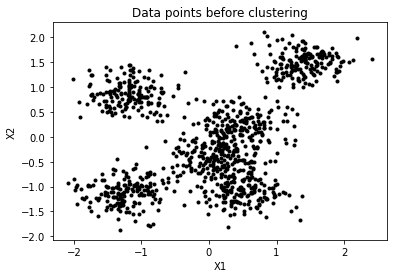

In [ ]:
total_points = X.shape[0]
x1 = []
y1 = []
for i in range(0,total_points):
  x1.append(X[i,0])
  y1.append(X[i,1])

plt.scatter(x1,y1,marker='.',c='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data points before clustering')
plt.show()

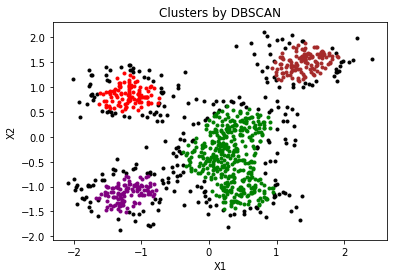

In [ ]:
total_points = X.shape[0]
colors = ['blue', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
for i in range(0,total_clusters):
  if i == 0:
    col = 'black'
  else:
    col = colors[i]

  x_cor = []
  y_cor = []
  for j in range(0,total_points):
    if clusters_assignments[j] == i:
      y_cor.append(X[j,1])
      x_cor.append(X[j,0])

  plt.scatter(x_cor,y_cor,c = col, marker='.')
  
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clusters by DBSCAN')
plt.show()

**Application**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Country-data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
len(df)

167

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


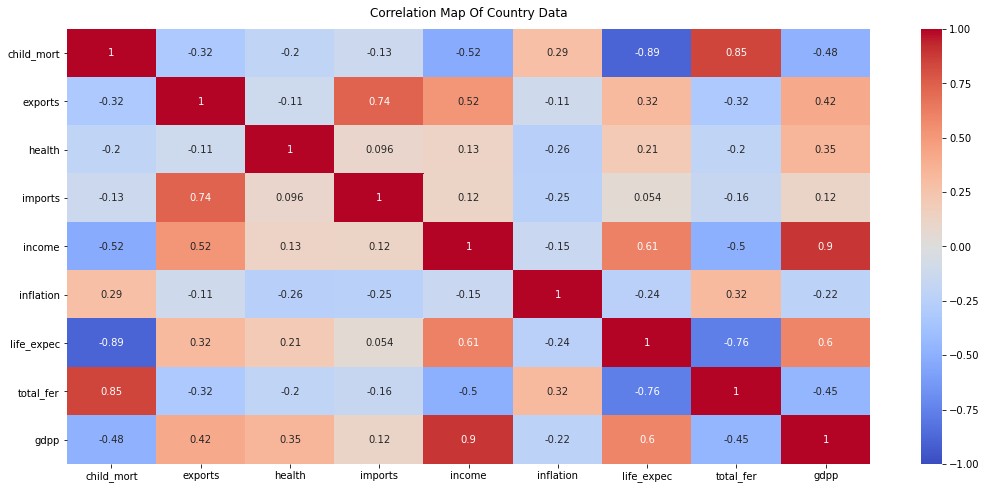

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
plt.title('Correlation Map Of Country Data', fontdict={'fontsize':12}, pad=12);

**The top 3 highest positive correlation score:**

gdpp and income with 0.9

total_fer and child_mort with 0.85

imports and exports with 0.74

**K Means algorithm**

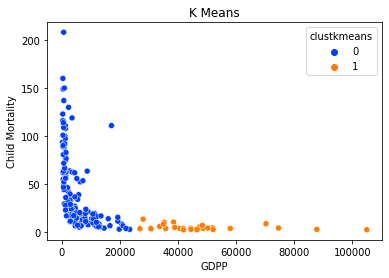

In [ ]:
# Kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

country_data = pd.read_csv("/content/drive/My Drive/Country-data.csv")
count_data = country_data[['child_mort', 'gdpp']]

kmeans = KMeans(n_clusters = 2)
kmeans.fit(count_data)
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_

sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.title('K Means')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.show()

**DBSCAN**

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(country_clust)
total_clusters_data,clusters_assignments_data = DBSCAN(data,7,0.4)

labels = clusters_assignments_data
country_clust['clustdbscan'] = labels

print("Number of clusters: ",total_clusters_data)

Number of clusters:  3


Text(0, 0.5, 'Child Mortality')

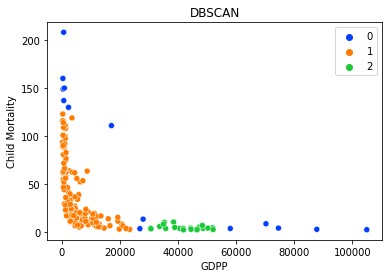

In [ ]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

**Conclusion -**

I can see the noise in the dataset by DBSCAN algorithm which I couldn't infer from KMeans.